<a href="https://colab.research.google.com/github/DrDavidL/dhds/blob/main/dl_live_01_DMv1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Data Science Notebook

## *Welcome Feinberg Medical Students!!!*

## Purpose

This interactive Colab notebook will help you become acquainted with the POWER of data science notebooks to retrieve data files from... *anywhere*, preview file contents (e.g., just the first few rows of large tables of data), manipulate data, create neat visualizations, analyze data, and then apply machine learning to develop models and test them! Cool, huh??? 

You might wonder which computer is doing this for you? Your own? NO... there is a processor far off in the Internet that, through the benefits of cloud computing, has been allocated to YOU and your work HERE, right now! Your personal computer is merely displaying content that this other processor will manipulate at YOUR direction! **YOU**... are in charge! 

But wait... you don't know how to program? No worries! This notebook will enable you to see behind the scenes and understand what the programs are doing... while not having to code anything yourself!


### Please keep in mind:### 

*The goal of this exercise is for you to see, at a high level, how a data scientist retrieves a dataset for analysis, performs preliminary analyses and visualizations of a dataset, and then applies a machine learning algorithm to create a predictive model. You are not expected to do this on your own, but should come away with an understanding of the steps involved in this work.* 

*Lastly, for the few of you who are particularly interested, feel free to "steal" any of the code! Of course, you'll have to customize for your projects, but this should give you a little head start!*


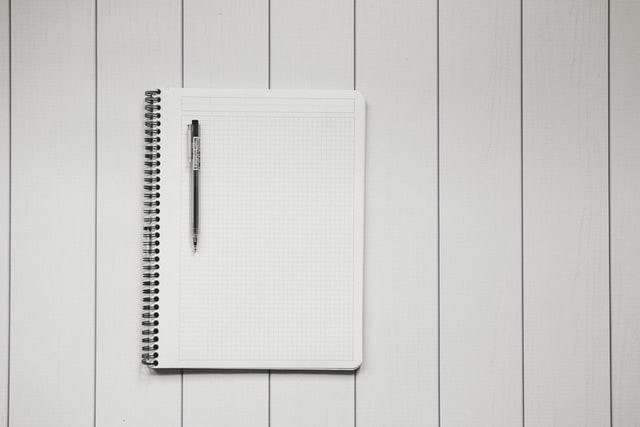

## How to use a notebook!


Of course, we mean how to use a *data science* notebook. This notebook is called a Colab notebook (very similar to another version, a Jupyter Notebook). Notebooks are assembled from cells and cells contain:

>  - text (like this that you're reading now)
>  - `code` (commands your cloud computer will execute for you)

### Navigation

How should we move up and down the page to explore these cells? Click once to select a cell and then:  

>  **Use the arrow keys on your keyboard.**

Try it out! Go up and down the page and come back here! (If you get stuck, or can't exit programming code, click the escape (esc) key on your keyboard.) Use arrows to navigate since then you always know which cell is active - the one you highlighted and selected through the arrow keys! Once you're finished with a cell, and this one ends here, click the down arrow to move to the next cell.


### Editing

This cell (the one you're reading now) is authored with  simple formatting called *markdown*. If you double click inside this cell or hit *enter* (the return key) the screen will split and you'll see the *raw* text nearby with the code revealed next to the polished text.

Try it - hit enter! Ok... now you can edit or delete any text! Don't delete everything... but also don't worry; this is your own view on your cloud computer. You're not changing anything for anyone else. Ummm... how do I go back and forth from editing to viewing? 

> **Use esc:** To return to the viewing mode.   
> **Use enter:** For edit mode again.  



### How do I use the interactive stuff???

Some cells are coding cells. You'll recognize them since they have confusing symbols in them (like `#` or words like matplotlib). To run the code in those cells there are two methods: 

> 1. **Click the play symbol** that appears next to that cell; or       
> 2. **Hold the control key and then click the enter key**. (Control-enter)
> 3. **Run code sequentially on the page.** Some of the code requires output from coding cells higher up on the page, so read and run the code cells sequentially down the page to avoid errors.

*(If you're not already logged into Google at the top right of the screen, you'll be prompted to do so before the cells will run.)*


## Our Agenda

Now that you understand why we are here and how to navigate a data science notebook, we can get down to business. We will:  

1. Setup your cloud computer with the right programs so it can perform your analysis. You don't need to understand this other than we will help you tell your computer what programs it needs to manipulate and visualize data! (This is the Library Import section.)
2. Retrieve the data set you are going to explore! 
3. View some of the data so you know what you're working with!
4. Visualize different aspects of your data set.
5. Select a variable to predict. 
6. Choose a portion of your dataset to generate your predictive model. 
7. Validate your model against the fresh component of your dataset to see how well your model works!

# Prepare our cloud computer!

## Library import

This is where we tell our cloud computer which programs it needs. Just 2 things to know here:

> 1. **The # symbol**: Please read all text following the **#** symbol in code cells like the one below. The text following the #'s are *`comments`* that explain the code so you can understand what's going on! 
> 2. Use **Control-enter** or click the play 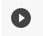 symbol to run the code! You'll see when the code from the cell is finished running when the **[  ]** before the cell will briefly change to include a "stop play" symbol and then switch to a number after you leave the cell and processing is complete. A green checkmark will also appear to the left. (Sometimes it's so fast, you can't see it; other times it may take a minute to process.) The number under the checkmark shows how long it took to process. After you leave the cell, the number appearing indicates the order in which the cell executed on the page. 

In [ ]:
# Be sure to run this critical first cell to import "libaries" and prepare our cloud computer! 
# Remember, click the "play" button to the left or control-enter.
# If you haven't logged into Google, you'll be prompted. Also... (and I say this with care...) 
# Ignore the warning prompt if you see one and proceed.
# This will then load the right programs so we can analyze our data!

import math
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from google.colab import data_table
data_table.enable_dataframe_formatter()


# Options set here for setting views at a reasonable size

pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Some of the visualizing too

import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)




# Data import

This notebook utilizes a dataset sourced from University of Virginia studies by Dr. Robert Schorling of several hundred rural African American patients. Additional information on this data set is available here:   
> https://hbiostat.org/data/repo/diabetes.html   
> http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Diabetes.html

Using this data source, Dr. Robert Hoyt (https://data.world/rhoyt) assigned patients to a diabetes category if their hemoglobin A1c values were 6.5 or greater (https://data.world/informatics-edu/diabetes-prediction). The dataset  explored here is the modified version from Dr. Hoyt, almost ready to go for our explorations. 

Our next step: Let's retrieve the data to use in our Notebook!



In [ ]:
# Run this cell to reference the website that is holding the diabetes data in a CSV (comma separated values) file! 

website = "https://drive.google.com/uc?export=download&id=1PQM8eQnQpaJwe9mAVb_XBpZoWoA5nTlM"

# Now, let's save the CSV file at that website in a format for exploration. This is called a Pandas dataframe. 
# Pandas is the program (e.g., like Excel). Think of a dataframe as a powerful table, like an Excel spreadsheet. 
# We will call the fresh file with the data "dm_raw". (Note in coding, punctuation is outside quotes.) 
# The command below assigns the name dm_raw to the CSV file retrieved from the website! 

dm_raw = pd.read_csv(website)

# Data processing
 
First, let's check out the first few rows of the table to see what we're dealing with and make sure it imported cleanly.

In [ ]:
# Let's look at just the first few rows of data in our file. We can do this with the ".head" command added to our file name. 
# And... No worries here! You don't need to memorize these commands. These explanations are simply so you can follow along!

dm_raw.head()

If we look ahead for what we're planning to do, it's important to know that numbers pulled in from our CSV file are interpreted by our cloud computer as numbers and not as text symbols. Pandas usually does a good job of this, but let's check and see!

In [ ]:
# The ".dtypes" command will show us the data types for each column in our dataframe. (Remember a dataframe is like an Excel spreadsheet.) 

dm_raw.dtypes

Looking at the output above, our cloud computer with Pandas accurately recognized numbers (integers: int64 and decimals: float64) versus words (Gender and Diabetes: objects) in our dataset! 

OK... Now, is there a quick way to summarize all the content in our dataframe? Sure enough, there is! The command is called "describe".

In [ ]:
# Let's first "describe" just the numbers. This command will show us facts about the numerical values in our dataframe.

dm_raw.describe(include='number')

With this simple `describe` function we see each of the nmerical columns above with statistics beneath then. First, the `count` is the number of rows in our data set. For use, this represents patients. The `mean` is the mean average, `std` is the standard deviation, `min` is the lowest value, `max` is the highest value, and the `25/50/75` refer to the quartile break points. (Impressive work! With just one click of a mouse!) 

Several interesting observations are now possible!   

> - There are 390 rows (unique patients) and no data is missing. (390 across the board.)    
> - The mean fasting glucose doesn't look that high (107), although the max is 385.
> - The mean age is 46.8 and the oldest person is 92.
> - The mean BMI is 28.8, max is 55.8 and min is 15.2.

But wait - aren't we interested in diabetes? How many patients with diabetes are there in our dataset? Let's analyze the columns with `objects` (gender and diabetes).

In [ ]:
dm_raw.describe(include='object')

For `object` descriptions, `top` means the most frequent category seen and `freq` indicates how many times the `top` category was seen. Given this we observe: 
> - There is no missing data here. (The count is again 390 for gender and diabetes.)
> - There is a majority of female patients. (228/390)   
> - Most patients do not have diabetes. (330/390)   

Before we start analyzing our data further, looking back at the first 5 rows of our dataframe, we see that some column names have spaces or slashes. This will be a problem later when we try to call out some columns. Let's leave our "raw" dataframe intact, in case we have to go back to it. And then, let's copy it to a new dataframe (dm_clean [link text](https://)) with improved column headers. 

We'll make a new dataframe `dm_clean` with the commands below that has better column headings. 


In [ ]:
# The two commands below first copy the dataframe and then re-interpret the types of data. Then we are ready to adjust the column names.

dm_clean = pd.DataFrame(columns = dm_raw.columns, data = copy.deepcopy(dm_raw.values))
dm_clean = dm_clean.infer_objects()

# OK - our original data is safe. Now, let's modify our copied dataframe. 
# First, let's remove all the spaces from any column names and replace with an underscore for easier manipulation.

dm_clean.columns = [c.replace(' ', '_') for c in dm_clean.columns]

# Now let's do the same thing for the /'s.)

dm_clean.columns = [c.replace('/', '_') for c in dm_clean.columns]

# Now let's look at the top 5 rows of our dataset with the updated column names.

dm_clean.head()


Great! all the spaces in column names and slashes were replaced by `_`. Let's doublecheck that the columns are recognized correctly as numbers or objects in our copied version.

In [ ]:

# The data types (dtypes) command will reassure us that our "clean" copy is recognized accurately by Pandas.

dm_clean.dtypes

Great; it worked. We see again that there are 15 columns. To start diving in with our analysis, let's begin with a smaller set of 4 columns and see how a few of the variables relate to each other. Your cloud computer can analyze all of these at once, but it's easier to understand if we start with a smaller set. Let's pick `Age, Systolic_BP, waist and Glucose`, although, we could have selected other values here. 

In [ ]:
# The command below will assign dm2 to refer only to our 4 columns. 

dm2 = dm_clean[['Age','Systolic_BP','waist','Glucose']]

# Let's see the top rows of our small set of interest.

dm2.head()



Now, let's visualize how these variables relate to each other.

In [ ]:
# This command will generate 2x2 graphs for each of the 4 variable combinations
# AND  perform a linear regression to reveal potential relationships among the variables.

g2 = sns.pairplot(dm2, kind = 'reg')


### Exploration of 4 variables

The view above now hints at the power of the cloud computer under your command. Here are a few observations:  

1. The **histograms** along the diagonal plot values against frequency. So, for age, systolic BP, and waist circumference we see most values in the middle ranges. For the fasting glucose values, there are some extreme high outliers. 
2. Then, the linear regression lines in the bivariate (2 variable) graphs have some interesting findings. But before we analyze this, it's important to consider what we mean when we perform a *linear regression*. This approach explores the possibility that the relationship between the two variables  in each graph above is linear, i.e., a straight line! This may not be the case at all, but is often useful as a quick assessment. Remember that the equation for a line is:  
> y = mx + b

So, the linear regression determines the best values for m (slope) and b (error or displacement) that leads to the smallest error. Enough statistics, but just one more point: The independent variable should be on the x axis and the dependent variable on the y axis for linear regression to make sense. Let's choose `Age` to examine more closely its effect on the other values. To do this then, let's look at just those graphs where age is on the x-axis.  

In [ ]:
# First let's assign the dependent variables for analysis to be the three columns we wish to analyze against age.

dm3 = dm_clean[['Systolic_BP','Glucose', 'waist']]

# Let's generate 3 separate graphs looking at linear regression (sns.regplot) for age versus each of the three columns.
# These are going to be expanded views of the "all at once" 2x2 view above so we can take a closer look at the graphs
# where age was on the x-axis.

for i, col in enumerate(dm3.columns):
  plt.figure(i)
  sns.regplot(x=dm2.Age, y=col, data=dm2)

Examining the linear regression graphs above, weight, fasting glucose, and systolic blood pressure tend to rise with age in our dataset. This is in keeping with what we often see in practice. There seem to be fewer dots on the far right side, though. Let's look more closely at the overall age distribution.


In [ ]:
# These commands will create a single histogram for the variable, Age. 


dm_clean.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')





We can see a bit more clearly how the number of older patients tapers off at high ages.

In [ ]:
# Let's see how patients with and without diabetes compare for the numerical features in the dataset. 
# That is, let's see if patients with diabetes have higher cholesterol values, are older, weigh more, etc.
# We'll use the convenient "groupby" command below to show mean values for patients with and without diabetes in our dataset. 

dm_group_dm = dm_clean.groupby('Diabetes').mean()

dm_group_dm.round(1)

So, there are a few new observations about our dataset:   
> - Diabetes patients have much higher mean fasting glucose values. (Not exactly a surprise...)   
> - HDL is lower for patients with diabetes. We expected that!
> - Patients with diabetes in our set are older.
> - Patients with diabetes appear to weigh more and have higher BMI and SBP, too!   


In [ ]:
#Now, let's "groupby" gender as reported in the dataset to see how these groups may differ.

dm_group_gender = dm_clean.groupby('Gender').mean()

dm_group_gender.round(1)

Among other findings, women in our dataset have higher mean cholesterol, lower mean glucose, higher HDL, lower height, and higher BMI.  

In [ ]:
# Now Let's visualize the women and the men with respect to presence or absence of diabetes.

pd.crosstab(dm_raw.Gender,dm_raw.Diabetes).plot(kind='bar')
plt.title('Presence of Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')

This visualization is a more memorable view than just looking at the numbers. We have many more patients in our dataset without diabetes than with diabetes. And we have fewer males.

In [ ]:
# This segment of code below is used to switch our two object columns over to integer columns. 
# This will be helpful when we calculate correlations for the presence of diabetes and create a predictive model. 
# Now, "no diabetes" will become "0" and "diabetes" will become "1" where they appear in the Diabetes column of our dataframe.
 

if dm_clean.Diabetes.dtype == object:
  dm_clean.Diabetes = dm_clean.Diabetes.replace(['No diabetes','Diabetes'],['0','1'])

if dm_clean.Gender.dtype == object:
  dm_clean.Gender = dm_clean.Gender.replace(['male','female'],['1','0'])

dm_clean.Diabetes = dm_clean.Diabetes.astype(str).astype(int)
dm_clean.Gender = dm_clean.Gender.astype(str).astype(int)
dm_clean.dtypes

In [ ]:
# Prior to running a model, let's assess for correlations among each pair of values, now that they are all numerical. 
# For our purposes, we are especially interested in correlations with diabetes; although, this simple 
# command (corr) will nicely generate correlations among all the features of a our dataset with just a simple command.
# We first make a dataframe that contains the correlations and then round to 3 decimal placess. 

corr_df = dm_clean.corr()

corr_df.round(3)


Since our focus is identifying how these factors may impact a diagnosis of diabetes, look at the **bottom** row above. The numbers to the right of diabetes indicate correlations with the presence of diabetes. Note fasting glucose, has the highest positive correlation, (0.689). And, HDL, a negative correlation (-0.123). This negative correlation indicates that a lower HDL value is correlated with the presence of diabetes in our dataset). 

In [ ]:
# Another approach using colors instead of numbers is shown below with a heatmap.

fig, ax = plt.subplots(figsize=(8,8))  
corr = dm_clean.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

The heatmap is color coded. The scale on the right side indicates that the lightest colors indicate more positive correlations. Looking across the diabetes row at the bottom, you can see the light color for the glucose column and a much darker color for the HDL cholesterol. 

# We are ready to create a predictive model!

Remember, out dataset reveals data about each patient and whether or not each patient has diabetes. Perhaps the variables we have about our patients can be used to predict whether or not patients have diabetes. Let's try this! There are a few steps we need to follow to generate a predictive model from a dataset:   

1. Let's divide our dataset into a `training set` and a `test set`. Data elements in the training set are used to create a model that best predicts the presence of diabetes. Then, the test data is used to see how well our model performs at predicting diabetes using data that wasn't included in process of deriving the model. 
2. Let's assign names to the set data elements we'll use and to the set of outcomes we want to predict for both our training and test data sets.
3. Let's *normalize* the data elements. What this means is to apply a consistent scale for the numerical values in different columns. This preserves the information in the columns while preventing one column from having an exaggerated effect simply because the numbers are larger. We will set the mean value at 0 and the standard deviation at 1. This normalization of data elements will then help us better understand the relative importance of each feature in the model.


In [ ]:
# This is step 1: Randomly dividing our dataset into a training set (80% of rows) and a test set (20% of rows).

dmTrain = dm_clean.sample(frac=0.8, random_state=25)
dmTest = dm_clean.drop(dmTrain.index)


# This is step 2: Assigning the right labels to indicate what value we'd like to predict. 
# The trainLabel reveals whether or not the patient has diabetes and is used in generating an algorithm.
# The trainData includes all the features used to generate the algorithm.
# The testLabel reveals the presence or absence of diabetes for the test set to check and see how well our predictions hold up to reality.
# The testData is used to make the predictions for our test set of patient.

trainLabel = np.asarray(dmTrain['Diabetes'])
trainData = np.asarray(dmTrain.drop(labels = 'Diabetes',axis = 1))
testLabel = np.asarray(dmTest['Diabetes'])
testData = np.asarray(dmTest.drop(labels = 'Diabetes',axis = 1))

# Now, let's normalize our numerical features so we can understand our model more easily later.
# This takes all the numerical values for each of our columns and converts them to a uniform scale for analysis.

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis =0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

# Below you can see what the normalized values now look like that will be used in the predictive algorithm.

testData

In [ ]:
# The simple command below will create a (not simple) logistic regression model to predict the presence of diabetes. 

haveDiabetes = LogisticRegression()
haveDiabetes.fit(trainData, trainLabel)

Great! We have our model, its name is `haveDiabetes` and it was created by performing logistic regression across our database variables and optimizing parameters for the best prediction. 

And... what did we find? How good is our model? That is, how accurately does it predict diabetes and how can we measure this?   

Accuracy can be defined as the percentage of correctly classified instances (TP + TN)/(TP + TN + FP + FN). where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives, respectively. 

Running the code below will apply the model to our test data so we can calculate its accuracy. We'll also generate a confusion matrix (2x2 diagram).

In [ ]:
predictions = haveDiabetes.predict(testData)
metrics.confusion_matrix(testLabel, predictions)
accuracy = haveDiabetes.score(testData, testLabel)
cm = metrics.confusion_matrix(testLabel, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Diabetes');
plt.xlabel('Predicted Diabetes');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

92.3% looks pretty good! Let's analyze our model to see how it weighted different factors to optimize the prediction.

In [ ]:
coeff = list(haveDiabetes.coef_[0])
labels = list(dmTrain.drop(labels = 'Diabetes',axis = 1))
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Here, as earlier, you can see that fasting glucose was weighted the highest in a positive direction for predicting diabetes and HDL cholesterol had the greatest negative weighting in this model.  

And... how about that "area under the receiver operating characteristic curve?" Shouldn't we measure that statistic, too? 

In [ ]:
lr_probs = haveDiabetes.predict_proba(testData)

lr_probs = lr_probs[:,1]

ns_probs = [0 for _ in range(len(testLabel))]


ns_auc = roc_auc_score(testLabel, ns_probs)
lr_auc = roc_auc_score(testLabel, lr_probs)


print('"No skill" model: ROC AUC=%.3f' % (ns_auc))
print('Our Diabetes Model: ROC AUC=%.3f' % (lr_auc))


Our diabetes model, above, performs much better than the "no skill" model that assumes everyone has the most common finding (no diabetes). That's good... Can we see the ROC curve? Yes!! The code below will generate the ROC curve for our model. 

In [ ]:
ns_fpr, ns_tpr, _ =roc_curve(testLabel, ns_probs)
lr_fpr, lr_tpr, _ =roc_curve(testLabel, lr_probs)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()


plt.show()


Remember, for an ROC curve, we want to get as high a True Positive Rate as possible with as as low a False Positive Rate as possible (upper left corner). So, we are able to reach about a 90% TPR with about a 10% FPR.

Sometimes, this may be misleading with relatively small datasets like ours, though, and another curve, the Precision Recall curve better highlights limitations:

In [ ]:
yhat = haveDiabetes.predict(testData)
lr_precision, lr_recall, _ = precision_recall_curve(testLabel, lr_probs)
lr_f1, lr_auc = f1_score(testLabel, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f precision/recall auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testLabel[testLabel==1]) / len(testLabel)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Here, this curve shows that precision (positive predictive value) stays high until the recall (sensitivity) reaches about 0.5. What that means is that if our goal is to set a threshold for our model to detect half the patients with diabetes, our positive predictive value with our model can stay very high. We can do this with very few false positives!  

But, if we want to set a threshold for our model to find more than half of the patients with diabetes, our positive predictive value drops off pretty fast. This means we start accumulating more false positives for each true positive we find. 

# Before you leave...

1. Please complete the ***very brief*** statement of completion survey here:   
>  https://bit.ly/fsmcolab1survey

2. Check out the references for more information below!  

3. Check out the **BONUS** machine learning models at the end, below references!

Thank you!!!

# References and more

Perhaps you loved this so much, you want to make your own Colab notebooks! How would you do this???

First, save a copy of this notebook so you can always refer back to copy the libraries and leverage the code used on future notebooks.

Then, visit [here](https://colab.research.google.com/?utm_source=scs-index) for an overview and setup!

References:

1. Bento C. Support Vector Machines explained with Python examples [Internet]. Medium. 2020 [cited 2021 Nov 11]. Available from: https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85


2. Brownlee J. How to Use ROC Curves and Precision-Recall Curves for Classification in Python [Internet]. Machine Learning Mastery. 2018 [cited 2021 Nov 7]. Available from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

> - This is a great resource for explaining ROC curves and coding for them. (Other pages on the site are fantastic, too.)


3. Dhandhania K. End-to-End Data Science Example: Predicting Diabetes with Logistic Regression [Internet]. Medium. 2018 [cited 2021 Nov 7]. Available from: https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16

> - I came across this website as I was well on my way. There are many similarities to the approach followed above that is applied to a different data set. I applied the normalization, heatmap, and correlations methods discussed here.








# APPENDIX  

Here are examples applying other machine learning algorithms to our data set to generate predictive models: 

> - Naive Bayes
> - Support Vector Machine  
> - Random Forest 

The model's accuracy doesn't get better, although, we didn't have that large a data set and some approaches work optimally with larger or more complex data. Sometimes, as here, logistic regression appears best!

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(trainData, trainLabel)

y_pred = classifier.predict(testData)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(testLabel, y_pred)

ac = accuracy_score(testLabel,y_pred)



print("Naive Bayes\nAccuracy (normalized): " + str(ac))

print(cm)

An SVM (support vector machine) example:

In [ ]:
from sklearn import svm
svmmodel = svm.SVC(kernel='linear', degree=2)
svmmodel.fit(trainData, trainLabel)



from sklearn.metrics import accuracy_score
predictions_poly = svmmodel.predict(testData)
accuracy_poly = accuracy_score(testLabel, predictions_poly)
print("Linear Kernel\nAccuracy (normalized): " + str(accuracy_poly))

cm2 = confusion_matrix(testLabel, predictions_poly)
print(cm2)

A Random Forest example:

In [ ]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define the model
rfmodel = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfmodel, trainData, trainLabel, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))